In [15]:
#羅吉斯迴歸和決策樹
wdbcbig=read.csv("wdbc.txt",header=T)
wdbc=wdbcbig[,-1]
p=0.7
set.seed(123)
index=sample(2,nrow(wdbc),replace=T,prob=c(p,1-p))
wdbc.train=wdbc[index==1,]
wdbc.test=wdbc[index==2,]

wdbcbig.train=wdbcbig[index==1,]
wdbcbig.test=wdbcbig[index==2,]

train.result=glm(as.factor(diagnosis)~.,data=wdbc.train,family=binomial(link=logit))


#train confusion matrix
pred=predict(train.result,newdata=wdbc.train,
type="response")
pred=round(pred)
(tab=table(Y=wdbc.train$diagnosis,Ypred=pred))
cat("Total records(train)=",nrow(wdbc.train),"\n")
cat("Correct Classification Ratio(train)=", sum(diag(tab))/sum(tab)*100,"%\n")
#test confusion matrix
pred=predict(train.result,newdata=wdbc.test,
type="response")
pred=round(pred)
(tab=table(Y=wdbc.test$diagnosis,Ypred=pred))
cat("Total records(test)=",nrow(wdbc.test),"\n")
cat("Correct Classification Ratio(test)=", sum(diag(tab))/sum(tab)*100,"%\n")

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


   Ypred
Y     0   1
  B 263   0
  M   0 142

Total records(train)= 405 
Correct Classification Ratio(train)= 100 %


   Ypred
Y    0  1
  B 82 12
  M  6 64

Total records(test)= 164 
Correct Classification Ratio(test)= 89.02439 %


In [14]:
wdbcbig.test[wdbcbig.test$diagnosis=="M" & pred==0 , ]
nrow(wdbcbig.test[wdbcbig.test$diagnosis=="B" & pred==1 , ])

,id,diagnosis,c1,c2,c3,c4,c5,c6,c7,c8,⋯,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,854268,M,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,⋯,15.89,30.36,116.2,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140
195,87556202,M,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,⋯,16.08,27.78,118.6,784.7,0.1316,0.4648,0.4589,0.17270,0.3000,0.08701
216,8810987,M,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,⋯,15.75,26.93,104.4,750.1,0.1460,0.4370,0.4636,0.16540,0.3630,0.10590
264,889403,M,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,⋯,17.91,31.67,115.9,988.6,0.1084,0.1807,0.2260,0.08568,0.2683,0.06829
445,9110127,M,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,⋯,20.38,22.02,133.3,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225
490,913535,M,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.02307,⋯,19.18,26.56,127.3,1084.0,0.1009,0.2920,0.2477,0.08737,0.4677,0.07623


[1] 12

In [16]:
#test group(test.index sampling 30% records), remaining 70% as train group 
n=0.3*nrow(wdbc)
test.index=sample(1:nrow(wdbc),n)
wdbc.train=wdbc[-test.index,]
wdbc.test=wdbc[test.index,]

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 399 528.300 B ( 0.624060 0.375940 )  
   2) c23 < 105.15 238  82.970 B ( 0.957983 0.042017 )  
     4) c28 < 0.13505 222  22.820 B ( 0.990991 0.009009 )  
       8) c11 < 0.62555 217   0.000 B ( 1.000000 0.000000 ) *
       9) c11 > 0.62555 5   6.730 B ( 0.600000 0.400000 ) *
     5) c28 > 0.13505 16  22.180 M ( 0.500000 0.500000 )  
      10) c22 < 25.89 7   0.000 B ( 1.000000 0.000000 ) *
      11) c22 > 25.89 9   6.279 M ( 0.111111 0.888889 ) *
   3) c23 > 105.15 161 124.700 M ( 0.130435 0.869565 )  
     6) c28 < 0.15075 47  64.110 M ( 0.425532 0.574468 )  
      12) c22 < 19.415 10   0.000 B ( 1.000000 0.000000 ) *
      13) c22 > 19.415 37  43.180 M ( 0.270270 0.729730 )  
        26) c11 < 0.37575 14  18.250 B ( 0.642857 0.357143 )  
          52) c12 < 0.8418 7   8.376 M ( 0.285714 0.714286 ) *
          53) c12 > 0.8418 7   0.000 B ( 1.000000 0.000000 ) *
        27) c11 > 0.37575 23   8.227 M ( 0


Classification tree:
tree(formula = as.factor(diagnosis) ~ ., data = wdbc.train)
Variables actually used in tree construction:
[1] "c23" "c28" "c11" "c22" "c12" "c2" 
Number of terminal nodes:  10 
Residual mean deviance:  0.08899 = 34.62 / 389 
Misclassification error rate: 0.01754 = 7 / 399 

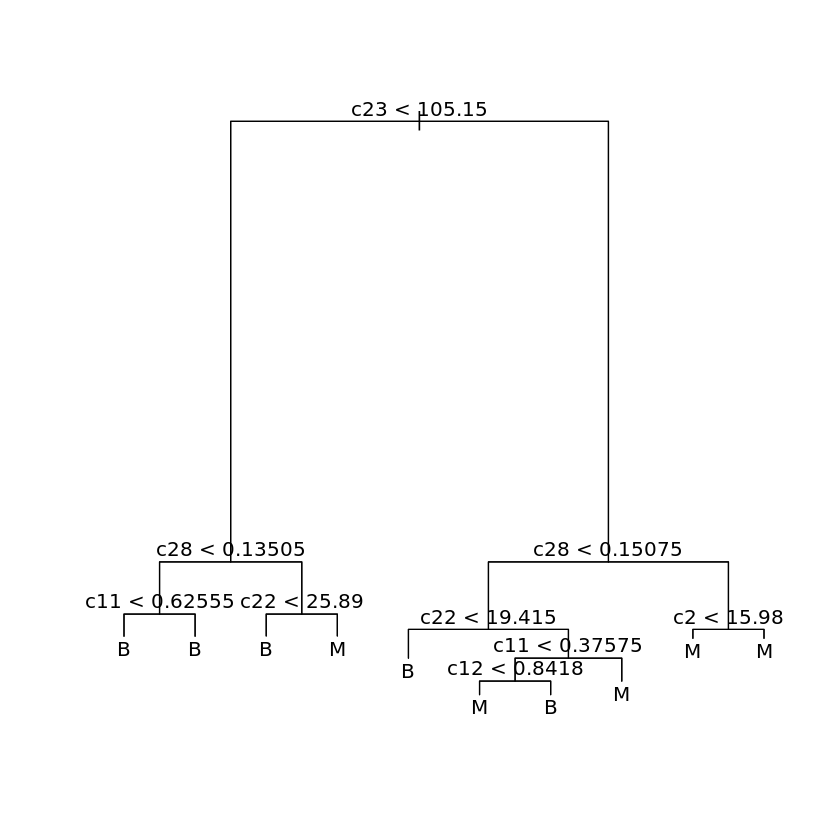

In [17]:
#decision tree
install.packages("tree")
library(tree)
wdbc.tree=tree(as.factor(diagnosis)~.,data=wdbc.train)   
wdbc.tree
summary(wdbc.tree)
plot(wdbc.tree)
text(wdbc.tree)

In [18]:
#train confusion matrix
diagnosis.train=wdbc$diagnosis[-test.index]
train.pred=predict(wdbc.tree,newdata= wdbc.train, type='class')
table.train=table(diagnosis.train,train.pred)
table.train
cat("Total records(train)=",nrow(wdbc.train), "\n")
cat("Correct Classification Ratio(train)=", sum (diag(table.train))/sum(table.train)*100,"%\n")

wdbc.train[diagnosis.train=="M" & train.pred=="B",]

               train.pred
diagnosis.train   B   M
              B 244   5
              M   2 148

Total records(train)= 399 
Correct Classification Ratio(train)= 98.24561 %


,diagnosis,c1,c2,c3,c4,c5,c6,c7,c8,c9,⋯,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,⋯,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
298,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,0.1619,⋯,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


In [19]:
#test confusion matrix
diagnosis.test=wdbc$diagnosis[test.index]
test.pred=predict(wdbc.tree,newdata=wdbc.test, type='class')
table.test=table(diagnosis.test,test.pred)
table.test
cat("Total records(test)=",nrow(wdbc.test),"\n")
cat("Correct Classification Ratio(test)=", sum(diag(table.test))/sum(table.test)*100,"%\n")

              test.pred
diagnosis.test   B   M
             B 103   5
             M   7  55

Total records(test)= 170 
Correct Classification Ratio(test)= 92.94118 %
